<a href="https://colab.research.google.com/github/DaniNar2/Prova/blob/main/SIGN_LANGUAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
labels = sorted(os.listdir('/content/drive/MyDrive/Sign_Language/ASL2'))
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing']


In [ ]:
#how many images in each folder and which label belong to which alphabet
from IPython.display import Image, display
num = []
for label in labels:
    path = '/content/drive/MyDrive/Sign_Language/ASL2/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

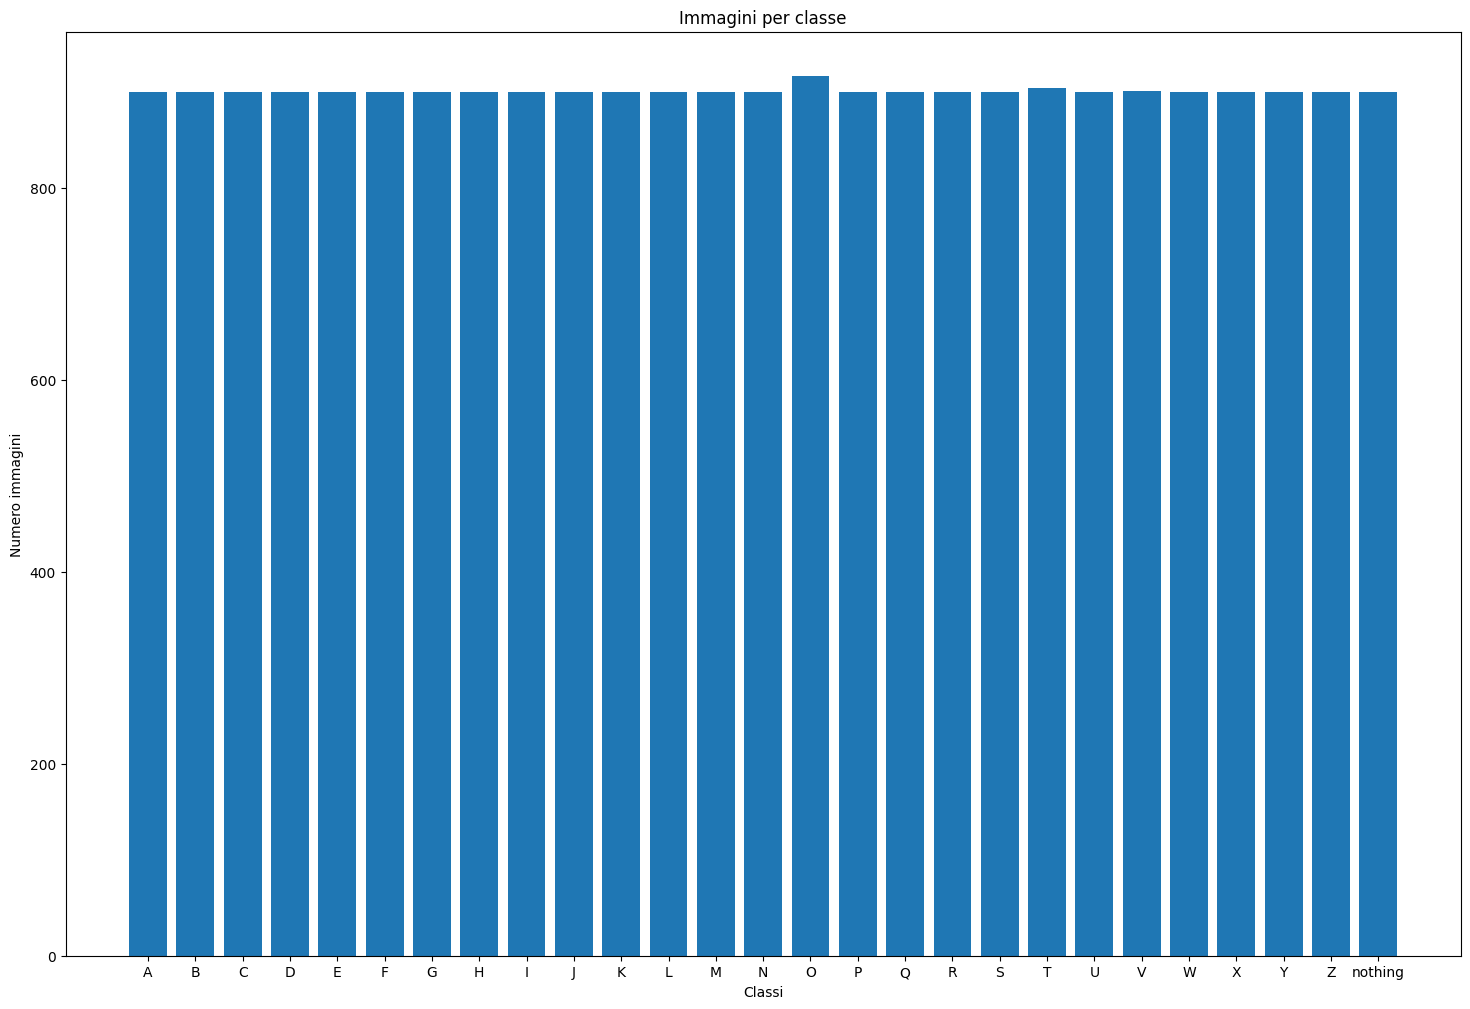

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,12))
plt.bar(labels, num)
plt.title('Immagini per classe')
plt.xlabel('Classi')
plt.ylabel('Numero immagini')
plt.show()

In [ ]:
#image processing converting images in arrays
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/content/drive/MyDrive/Sign_Language/ASL2/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (64, 64))
        x_data.append(np.array(image_resized)) #image_resized
        y_data.append(label)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('The shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

The shape of X is:  (24322, 64, 64, 3) and that of Y is:  (24322,)


In [ ]:
x_data

array([[[[ 18,  15,  16],
         [ 18,  15,  16],
         [ 18,  15,  16],
         ...,
         [  7,   5,   5],
         [  7,   5,   5],
         [  7,   5,   5]],

        [[ 17,  14,  15],
         [ 17,  14,  15],
         [ 18,  15,  16],
         ...,
         [  7,   5,   6],
         [  8,   6,   6],
         [  7,   5,   5]],

        [[ 17,  14,  15],
         [ 17,  14,  15],
         [ 17,  14,  14],
         ...,
         [  7,   5,   6],
         [  7,   5,   5],
         [  7,   5,   6]],

        ...,

        [[186, 191, 196],
         [189, 194, 198],
         [177, 183, 187],
         ...,
         [209, 214, 216],
         [208, 213, 215],
         [199, 202, 207]],

        [[175, 178, 183],
         [183, 187, 191],
         [175, 179, 184],
         ...,
         [179, 184, 189],
         [182, 189, 193],
         [212, 217, 220]],

        [[186, 190, 194],
         [199, 204, 208],
         [191, 195, 200],
         ...,
         [200, 204, 207],
        

In [ ]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [ ]:
x_data

array([[[[0.07058824, 0.05882353, 0.0627451 ],
         [0.07058824, 0.05882353, 0.0627451 ],
         [0.07058824, 0.05882353, 0.0627451 ],
         ...,
         [0.02745098, 0.01960784, 0.01960784],
         [0.02745098, 0.01960784, 0.01960784],
         [0.02745098, 0.01960784, 0.01960784]],

        [[0.06666667, 0.05490196, 0.05882353],
         [0.06666667, 0.05490196, 0.05882353],
         [0.07058824, 0.05882353, 0.0627451 ],
         ...,
         [0.02745098, 0.01960784, 0.02352941],
         [0.03137255, 0.02352941, 0.02352941],
         [0.02745098, 0.01960784, 0.01960784]],

        [[0.06666667, 0.05490196, 0.05882353],
         [0.06666667, 0.05490196, 0.05882353],
         [0.06666667, 0.05490196, 0.05490196],
         ...,
         [0.02745098, 0.01960784, 0.02352941],
         [0.02745098, 0.01960784, 0.01960784],
         [0.02745098, 0.01960784, 0.02352941]],

        ...,

        [[0.7294118 , 0.7490196 , 0.76862746],
         [0.7411765 , 0.7607843 , 0.7764706 ]

In [ ]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

In [ ]:
y_encoded

array([ 0,  0,  0, ..., 26, 26, 26])

In [ ]:
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [ ]:
y_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [ ]:
q = [1,2,3,4,5]
np.random.shuffle(q)
q

In [ ]:
len(X),len(Y)

(24322, 24322)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [ ]:
# Initialing the CNN
#from tensorflow_core.python.keras.api.keras import optimizers
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application.
#kernel = he_uniform --> Ideal to work with relu.
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

classifier =  Sequential()

# Step 1 - Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3), activation='relu'))

# step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Adding second convolution layer
classifier.add(Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Adding 3rd Convolution Layer
classifier.add(Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=27, activation='softmax'))

# Compiling The CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 27)                  │           6,939 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,084,411 (4.14 MB)

 Trainable params: 1,084,411 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#fitting the model
history = classifier.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 102s 243ms/step - accuracy: 0.0793 - loss: 3.1736 - val_accuracy: 0.6956 - val_loss: 1.4523
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 101s 246ms/step - accuracy: 0.6234 - loss: 1.1517 - val_accuracy: 0.8573 - val_loss: 0.6344
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 101s 247ms/step - accuracy: 0.7888 - loss: 0.6367 - val_accuracy: 0.9079 - val_loss: 0.4218
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 140s 242ms/step - accuracy: 0.8469 - loss: 0.4555 - val_accuracy: 0.9340 - val_loss: 0.2788
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 104s 255ms/step - accuracy: 0.8849 - loss: 0.3367 - val_accuracy: 0.9417 - val_loss: 0.2720
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 141s 254ms/step - accuracy: 0.9094 - loss: 0.2732 - val_accuracy: 0.9500 - val_loss: 0.2060
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 100s 245ms/step - accuracy: 0.9184 - loss: 0.2319 - val_accuracy: 0.9589 - val_loss: 0.1631
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 104s 253ms/step - accuracy: 0.9329 -

In [ ]:
# Saving the model
classifier.save('Sign_Language_Model.h5')

#print(classifier.history.keys())

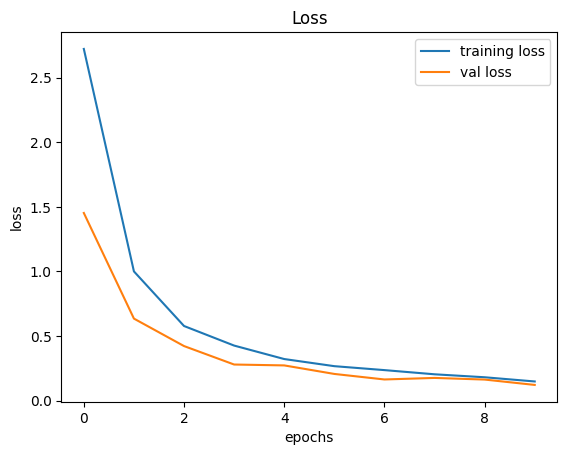

In [ ]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

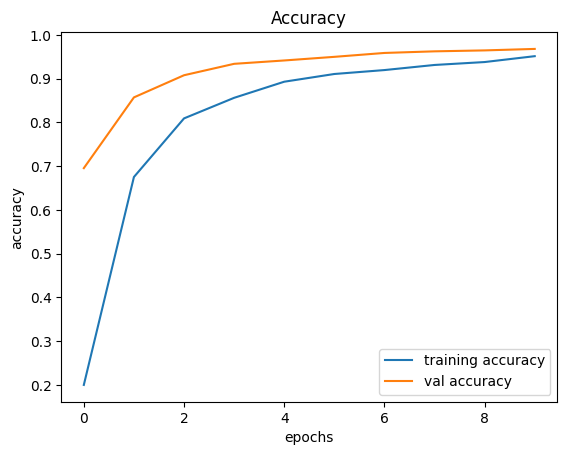

In [ ]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred

251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step


array([[5.1613292e-03, 4.2902227e-02, 1.7371956e-03, ..., 4.5029581e-02,
        7.9055436e-02, 2.6646715e-03],
       [3.5849870e-10, 8.2095266e-07, 3.9833139e-06, ..., 2.3040336e-15,
        5.2644830e-13, 9.7105222e-08],
       [7.3926314e-18, 6.6537388e-07, 5.1395075e-09, ..., 5.4483677e-17,
        1.1610488e-14, 4.0056822e-10],
       ...,
       [2.2431918e-08, 5.6255329e-09, 9.2925056e-08, ..., 7.7578916e-11,
        4.3101095e-14, 8.0292722e-08],
       [4.2540983e-06, 2.9974755e-14, 1.6058583e-12, ..., 9.9999547e-01,
        7.2745486e-08, 5.8886585e-12],
       [2.9256389e-06, 5.1886950e-08, 1.6928325e-08, ..., 5.6827271e-10,
        2.9859848e-05, 7.2070430e-09]], dtype=float32)

In [ ]:
# Predict probabilities
Y_pred_prob = classifier.predict(X_test)

# Get predicted classes
Y_pred = np.argmax(Y_pred_prob, axis=1)
print(Y_pred)

251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step
[10  8 14 ... 19 24 20]


In [ ]:
Y_test = np.argmax(Y_test, axis = 1)

In [ ]:
Y_test

array([10,  8, 14, ..., 19, 24, 20])

In [ ]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.9674847390058552


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       296
           1       0.99      0.98      0.98       293
           2       0.98      0.99      0.98       315
           3       0.98      0.98      0.98       301
           4       0.97      0.95      0.96       297
           5       0.99      0.98      0.99       303
           6       0.95      0.98      0.96       299
           7       0.99      0.97      0.98       274
           8       0.99      0.98      0.98       296
           9       0.91      0.96      0.93       303
          10       0.99      0.98      0.99       311
          11       0.97      1.00      0.98       277
          12       0.92      0.97      0.94       315
          13       0.98      0.91      0.94       283
          14       0.97      0.97      0.97       301
          15       0.95      0.99      0.97       286
          16       0.94      0.88      0.91       298
          17       1.00    

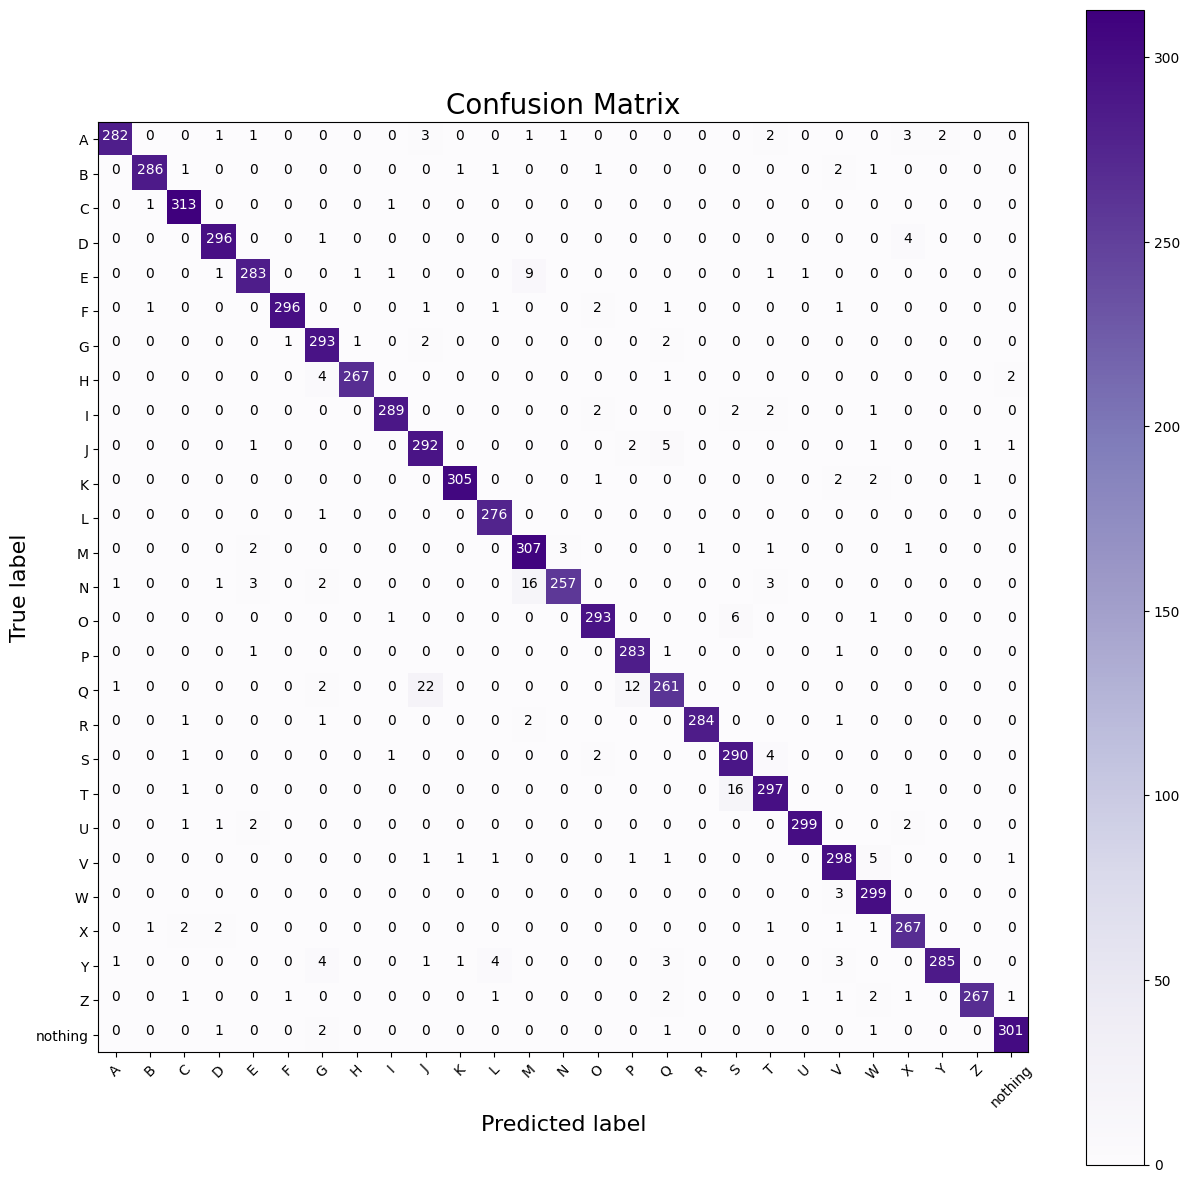

In [ ]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = classifier.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(Y_test, Y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
I


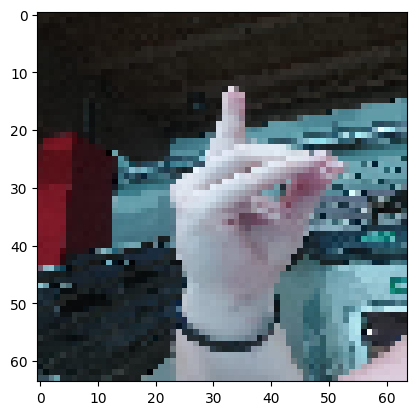

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'/content/drive/MyDrive/Sign_Language/Test/D_Sample.jpg',target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'A'
elif result[0][1] == 1:
    prediction = 'B'
elif result[0][2] == 1:
    prediction = 'C'
elif result[0][3] == 1:
    prediction = 'D'
elif result[0][4] == 1:
    prediction = 'E'
elif result[0][5] == 1:
    prediction = 'F'
elif result[0][6] == 1:
    prediction = 'G'
elif result[0][7] == 1:
    prediction = 'H'
elif result[0][8] == 1:
    prediction = 'I'
elif result[0][9] == 1:
    prediction = 'J'
elif result[0][10] == 1:
    prediction = 'K'
elif result[0][11] == 1:
    prediction = 'L'
elif result[0][12] == 1:
    prediction = 'M'
elif result[0][13] == 1:
    prediction = 'N'
elif result[0][14] == 1:
    prediction = 'O'
elif result[0][15] == 1:
    prediction = 'P'
elif result[0][16] == 1:
    prediction = 'Q'
elif result[0][17] == 1:
    prediction = 'R'
elif result[0][18] == 1:
    prediction = 'S'
elif result[0][19] == 1:
    prediction = 'T'
elif result[0][20] == 1:
    prediction = 'U'
elif result[0][21] == 1:
    prediction = 'V'
elif result[0][22] == 1:
    prediction = 'W'
elif result[0][23] == 1:
    prediction = 'X'
elif result[0][24] == 1:
    prediction = 'Y'
elif result[0][25] == 1:
    prediction = 'Z'
elif result[0][26] == 1:
    prediction = 'BLANK'
else:
    prediction = 'invalid'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
B


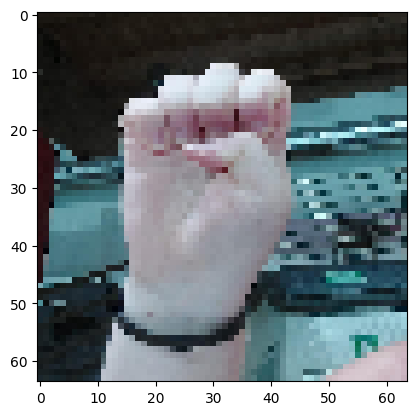

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'/content/drive/MyDrive/Sign_Language/Test/E_Sample.jpg',target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'A'
elif result[0][1] == 1:
    prediction = 'B'
elif result[0][2] == 1:
    prediction = 'C'
elif result[0][3] == 1:
    prediction = 'D'
elif result[0][4] == 1:
    prediction = 'E'
elif result[0][5] == 1:
    prediction = 'F'
elif result[0][6] == 1:
    prediction = 'G'
elif result[0][7] == 1:
    prediction = 'H'
elif result[0][8] == 1:
    prediction = 'I'
elif result[0][9] == 1:
    prediction = 'J'
elif result[0][10] == 1:
    prediction = 'K'
elif result[0][11] == 1:
    prediction = 'L'
elif result[0][12] == 1:
    prediction = 'M'
elif result[0][13] == 1:
    prediction = 'N'
elif result[0][14] == 1:
    prediction = 'O'
elif result[0][15] == 1:
    prediction = 'P'
elif result[0][16] == 1:
    prediction = 'Q'
elif result[0][17] == 1:
    prediction = 'R'
elif result[0][18] == 1:
    prediction = 'S'
elif result[0][19] == 1:
    prediction = 'T'
elif result[0][20] == 1:
    prediction = 'U'
elif result[0][21] == 1:
    prediction = 'V'
elif result[0][22] == 1:
    prediction = 'W'
elif result[0][23] == 1:
    prediction = 'X'
elif result[0][24] == 1:
    prediction = 'Y'
elif result[0][25] == 1:
    prediction = 'Z'
elif result[0][26] == 1:
    prediction = 'BLANK'
else:
    prediction = 'invalid'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
S


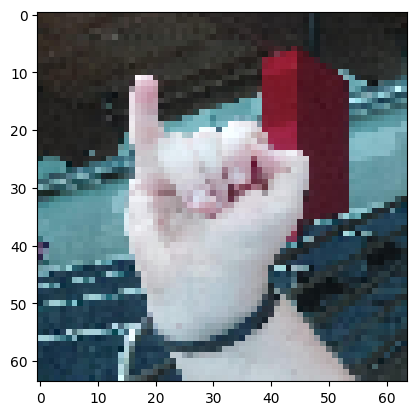

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'/content/drive/MyDrive/Sign_Language/Test/I_Sample.jpg',target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'A'
elif result[0][1] == 1:
    prediction = 'B'
elif result[0][2] == 1:
    prediction = 'C'
elif result[0][3] == 1:
    prediction = 'D'
elif result[0][4] == 1:
    prediction = 'E'
elif result[0][5] == 1:
    prediction = 'F'
elif result[0][6] == 1:
    prediction = 'G'
elif result[0][7] == 1:
    prediction = 'H'
elif result[0][8] == 1:
    prediction = 'I'
elif result[0][9] == 1:
    prediction = 'J'
elif result[0][10] == 1:
    prediction = 'K'
elif result[0][11] == 1:
    prediction = 'L'
elif result[0][12] == 1:
    prediction = 'M'
elif result[0][13] == 1:
    prediction = 'N'
elif result[0][14] == 1:
    prediction = 'O'
elif result[0][15] == 1:
    prediction = 'P'
elif result[0][16] == 1:
    prediction = 'Q'
elif result[0][17] == 1:
    prediction = 'R'
elif result[0][18] == 1:
    prediction = 'S'
elif result[0][19] == 1:
    prediction = 'T'
elif result[0][20] == 1:
    prediction = 'U'
elif result[0][21] == 1:
    prediction = 'V'
elif result[0][22] == 1:
    prediction = 'W'
elif result[0][23] == 1:
    prediction = 'X'
elif result[0][24] == 1:
    prediction = 'Y'
elif result[0][25] == 1:
    prediction = 'Z'
elif result[0][26] == 1:
    prediction = 'BLANK'
else:
    prediction = 'invalid'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
C


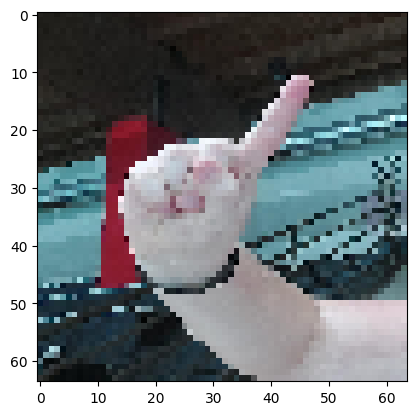

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'/content/drive/MyDrive/Sign_Language/Test/Z_Sample.jpg',target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'A'
elif result[0][1] == 1:
    prediction = 'B'
elif result[0][2] == 1:
    prediction = 'C'
elif result[0][3] == 1:
    prediction = 'D'
elif result[0][4] == 1:
    prediction = 'E'
elif result[0][5] == 1:
    prediction = 'F'
elif result[0][6] == 1:
    prediction = 'G'
elif result[0][7] == 1:
    prediction = 'H'
elif result[0][8] == 1:
    prediction = 'I'
elif result[0][9] == 1:
    prediction = 'J'
elif result[0][10] == 1:
    prediction = 'K'
elif result[0][11] == 1:
    prediction = 'L'
elif result[0][12] == 1:
    prediction = 'M'
elif result[0][13] == 1:
    prediction = 'N'
elif result[0][14] == 1:
    prediction = 'O'
elif result[0][15] == 1:
    prediction = 'P'
elif result[0][16] == 1:
    prediction = 'Q'
elif result[0][17] == 1:
    prediction = 'R'
elif result[0][18] == 1:
    prediction = 'S'
elif result[0][19] == 1:
    prediction = 'T'
elif result[0][20] == 1:
    prediction = 'U'
elif result[0][21] == 1:
    prediction = 'V'
elif result[0][22] == 1:
    prediction = 'W'
elif result[0][23] == 1:
    prediction = 'X'
elif result[0][24] == 1:
    prediction = 'Y'
elif result[0][25] == 1:
    prediction = 'Z'
elif result[0][26] == 1:
    prediction = 'BLANK'
else:
    prediction = 'invalid'

print(prediction)